In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

In [13]:
session = cc.database.create_session('/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_2.db')

In [14]:
temp_control = cc.querying.getvar('RYF.t_10.1990_1991.nc', 'tas_10m', session)


Exception during reset or similar
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/sqlalchemy/pool/base.py", line 697, in _finalize_fairy
    fairy._reset(pool)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/sqlalchemy/pool/base.py", line 893, in _reset
    pool._dialect.do_rollback(self)
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/sqlalchemy/engine/default.py", line 559, in do_rollback
    dbapi_connection.rollback()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 22999884511040 and this is thread id 22997313279744.
Exception closing connection <sqlite3.Connection object at 0x14ea81262990>
Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/sqlalchemy/po

In [15]:
temp_month = temp_control.groupby('time.month').mean('time')

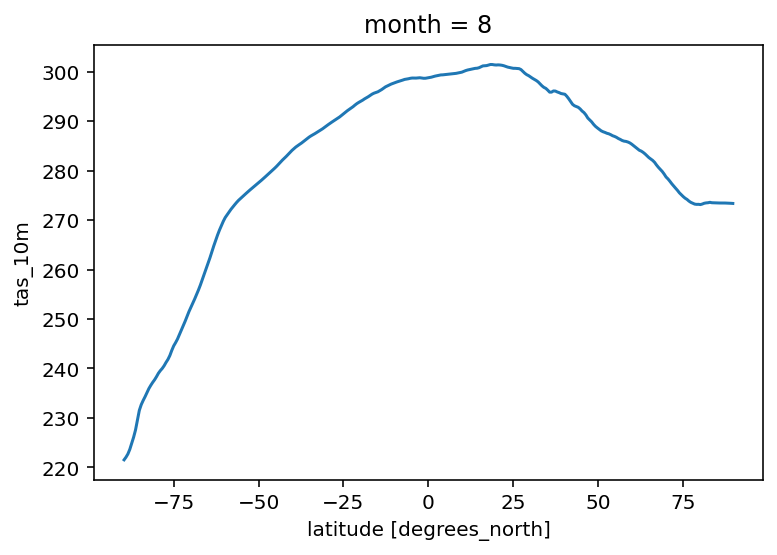

In [16]:
temp_month.mean('longitude').isel(month = 7).plot()

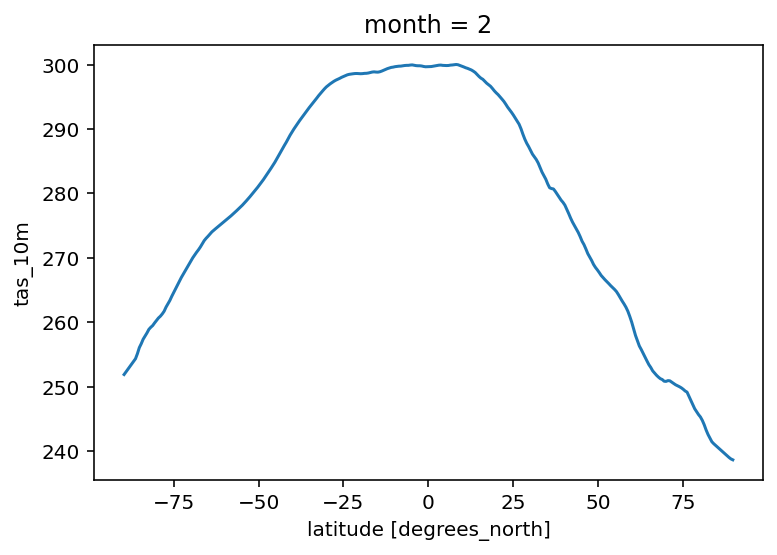

In [17]:
temp_month.mean('longitude').isel(month = 1).plot()

In [26]:
expt = '1deg_jra55_ryf_RCPcont'
variable = 'temp_global_ave'
darray_cont = cc.querying.getvar(expt, variable, session, ncfile = 'ocean_scalar.nc')
annual_average_cont = darray_cont.groupby('time.year').mean(dim='time')
darray_scont = cc.querying.getvar(expt, 'temp_surface_ave', session)
annual_average_scont = darray_scont.groupby('time.year').mean(dim='time')
temp_cont = cc.querying.getvar(expt, 'temp', session, ncfile = 'ocean.nc')
annual_SST_cont = temp_cont.isel(st_ocean = 0).groupby('time.year').mean(dim='time')
surface_heat_flux_cont= cc.querying.getvar(expt,'net_sfc_heating',session).groupby('time.year').sum(dim='time')
mld_cont = cc.querying.getvar(expt,'mld',session).groupby('time.year').mean(dim='time')
age_cont = cc.querying.getvar(expt,'age_global',session).groupby('time.year').mean(dim='time')
pot_rho_cont = cc.querying.getvar(expt,'pot_rho_2',session).groupby('time.year').mean(dim='time')
salt_cont = cc.querying.getvar(expt,'salt',session, ncfile = 'ocean.nc')#.groupby('time.year').mean(dim='time')
#salt_cont = cc.querying.getvar(expt,'salt',session)#.groupby('time.year').mean(dim='time')
dzt_cont = cc.querying.getvar(expt,'dzt',session, ncfile = 'ocean_heat.nc').groupby('time.year').mean(dim='time')
area_t_cont= cc.querying.getvar(expt,'area_t',session, n=-1)
SST_cont = cc.querying.getvar(expt,'temp',session, ncfile = 'ocean_heat.nc').isel(st_ocean = 0)

In [23]:
salt_cont

,Array,Chunk
Bytes,1.30 GB,2.70 MB
Shape,"(60, 50, 300, 360)","(1, 25, 150, 180)"
Count,966 Tasks,480 Chunks
Type,float32,numpy.ndarray


In [19]:
import gsw
SA = gsw.SA_from_SP(salt_cont,10.1325, 0, 0)
CT_freezing = gsw.CT_freezing(SA,10.1325,0)

(40.0, 90.0)

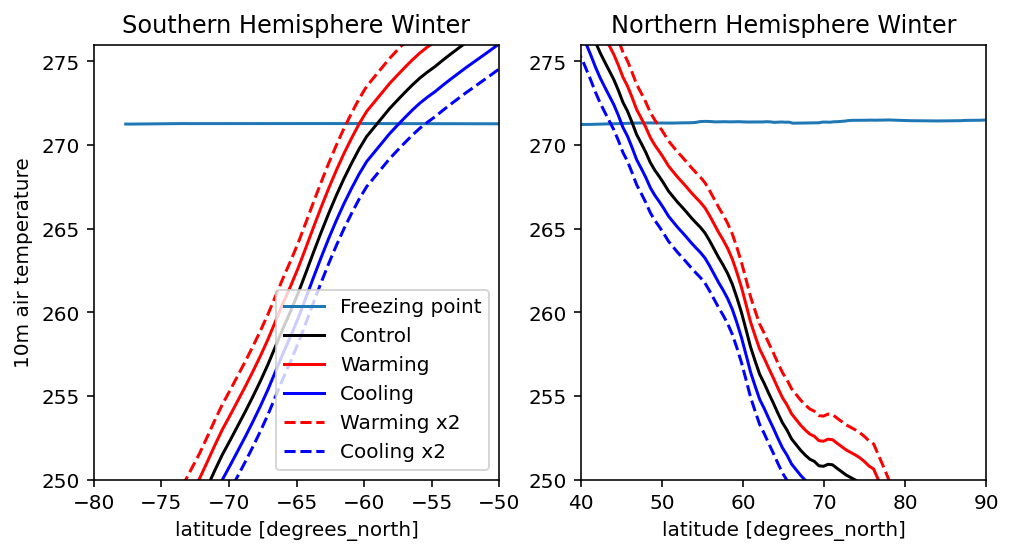

In [33]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (8,4))
(CT_freezing+273.15).isel(st_ocean =0).isel(year = 7).mean('xt_ocean').plot(ax = axes[0], label = 'Freezing point')
(CT_freezing+273.15).isel(st_ocean =0).isel(year = 1).mean('xt_ocean').plot(ax = axes[1])

temp_month.mean('longitude').isel(month = 7).plot(color = 'k', linestyle = '-', ax = axes[0], label = 'Control')
(temp_month+1.5).mean('longitude').isel(month = 7).plot(color = 'r', linestyle = '-', ax = axes[0], label = 'Warming')
(temp_month-1.5).mean('longitude').isel(month = 7).plot(color = 'b', linestyle = '-', ax = axes[0], label = 'Cooling')
(temp_month+3).mean('longitude').isel(month = 7).plot(color = 'r', linestyle = '--', ax = axes[0], label = 'Warming x2')
(temp_month-3).mean('longitude').isel(month = 7).plot(color = 'b', linestyle = '--', ax = axes[0], label = 'Cooling x2')
axes[0].set_title('Southern Hemisphere Winter')
axes[0].set_xlim(-80,-50)
axes[0].set_ylim(250,276)
axes[0].legend()
axes[0].set_ylabel('10m air temperature')

temp_month.mean('longitude').isel(month = 1).plot(color = 'k', linestyle = '-', ax = axes[1], label = 'Control')
(temp_month+1.5).mean('longitude').isel(month = 1).plot(color = 'r', linestyle = '-', ax = axes[1], label = 'Warming')
(temp_month-1.5).mean('longitude').isel(month = 1).plot(color = 'b', linestyle = '-', ax = axes[1], label = 'Cooling')
(temp_month+3).mean('longitude').isel(month = 1).plot(color = 'r', linestyle = '--', ax = axes[1], label = 'Warming x2')
(temp_month-3).mean('longitude').isel(month = 1).plot(color = 'b', linestyle = '--', ax = axes[1], label = 'Cooling x2')
axes[1].set_title('Northern Hemisphere Winter')
axes[1].set_ylim(250,276)
axes[1].set_ylabel('')
axes[1].set_xlim(40,90)


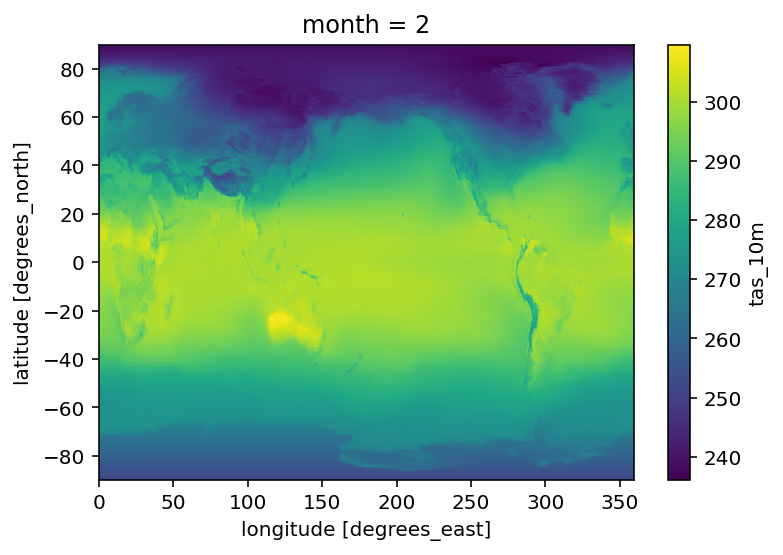

In [36]:
temp_month.isel(month = 1).plot()